In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
dataset_recovered = pd.read_csv(url_recovered)
dataset_confirmed = pd.read_csv(url_confirmed)
dataset_deaths = pd.read_csv(url_deaths)

In [42]:
dataset_deaths.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,28,36,39,43,44,48,56,63,72,82
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,4,7,7,7,7,8,8,9,10,12
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,9,10,12,12,16,18,21,21,21,22


In [45]:
df_argentina_recovered = dataset_recovered[dataset_recovered['Country/Region']=='Argentina']
df_argentina_confirmed = dataset_confirmed[dataset_confirmed['Country/Region']=='Argentina']
df_argentina_deaths = dataset_deaths[dataset_deaths['Country/Region']=='Argentina']
print(df_argentina_recovered)


  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
6            NaN      Argentina -38.4161 -63.6167        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
6        0        0        0  ...     248     256     266     279     280   

   4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  
6     325     338     358     365      375  

[1 rows x 84 columns]


{'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 0, '1/26/20': 0, '1/27/20': 0, '1/28/20': 0, '1/29/20': 0, '1/30/20': 0, '1/31/20': 0, '2/1/20': 0, '2/2/20': 0, '2/3/20': 0, '2/4/20': 0, '2/5/20': 0, '2/6/20': 0, '2/7/20': 0, '2/8/20': 0, '2/9/20': 0, '2/10/20': 0, '2/11/20': 0, '2/12/20': 0, '2/13/20': 0, '2/14/20': 0, '2/15/20': 0, '2/16/20': 0, '2/17/20': 0, '2/18/20': 0, '2/19/20': 0, '2/20/20': 0, '2/21/20': 0, '2/22/20': 0, '2/23/20': 0, '2/24/20': 0, '2/25/20': 0, '2/26/20': 0, '2/27/20': 0, '2/28/20': 0, '2/29/20': 0, '3/1/20': 0, '3/2/20': 0, '3/3/20': 0, '3/4/20': 0, '3/5/20': 0, '3/6/20': 0, '3/7/20': 0, '3/8/20': 0, '3/9/20': 0, '3/10/20': 0, '3/11/20': 0, '3/12/20': 0, '3/13/20': 0, '3/14/20': 1, '3/15/20': 1, '3/16/20': 1, '3/17/20': 3, '3/18/20': 3, '3/19/20': 3, '3/20/20': 3, '3/21/20': 3, '3/22/20': 3, '3/23/20': 3, '3/24/20': 52, '3/25/20': 52, '3/26/20': 63, '3/27/20': 72, '3/28/20': 72, '3/29/20': 72, '3/30/20': 228, '3/31/20': 240, '4/1/20': 248, '4/2/20': 25

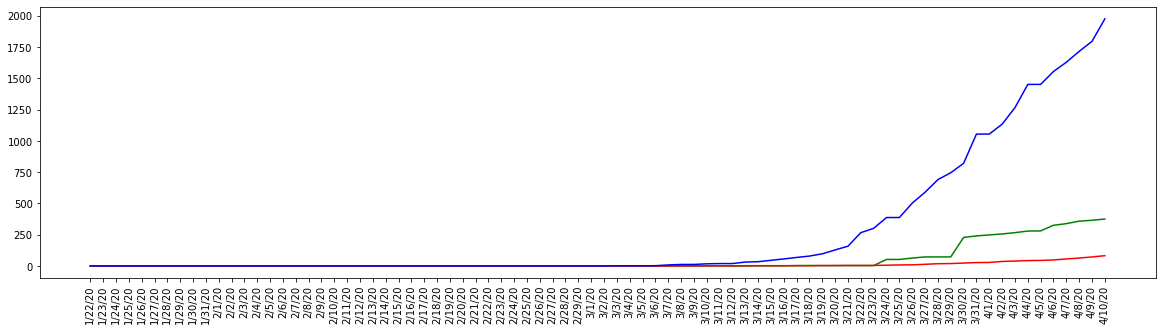

In [49]:
#df_argentina = df_argentina.drop(["Province/State", "Country/Region", "Lat", "Long"])
#df_argentina = df_argentina.drop("Lat", axis=1)
#print(df_argentina)

#df = pd.DataFrame(columns=np.arange(10))
df_recovered=df_argentina_recovered[df_argentina_recovered.columns[4:]]
df_deaths=df_argentina_deaths[df_argentina_deaths.columns[4:]]
df_confirmed=df_argentina_confirmed[df_argentina_confirmed.columns[4:]]
#print(df)

#plt.plot(df)

#plt.hist(df,bins=100)
#print(np.arange(84).reshape(1,(84)))
#print(df)
#days=np.arange(84).reshape(1,(84))

dic_recovered=df_recovered.to_dict(orient='records')[0]
dic_deaths=df_deaths.to_dict(orient='records')[0]
dic_confirmed=df_confirmed.to_dict(orient='records')[0]
print(dic_recovered)
print(dic_deaths)
print(dic_confirmed)

 
plt.figure(figsize=(20,5))
plt.plot(*zip(*(dic_recovered.items())),color='g')
plt.plot(*zip(*(dic_deaths.items())),color='r')
plt.plot(*zip(*(dic_confirmed.items())),color='b')
plt.xticks(rotation=90)

plt.show()


#plt.plot(df,days)